# Downloading Stream Gauge Data, Average Daily Flows
This script will download and save daily averaged discharge values for a given USGS stream gauge for the time period selected. The USGS maintains a large network of stream gauges all over the nation, you can see the gauge sites for Washington State here, https://waterdata.usgs.gov/wa/nwis/rt

This script was originally written, Allison Pfeiffer (WWU), and then modified by Sean C. Crosby (USGS)

In [1]:
# Load the necessary python packages
import requests
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Below you will enter the the stream gauge you are interested in. You can look up the stream gauge ID online. Make sure to give sitenum a string. In the next cell enter the dates you are interested in examining. Below I've selected the 2018/2019 water year.

In [2]:
# Enter your site number as a string, for example Ferndale is "12213100"
sitenum = "12200500"

In [6]:
# Now enter the start and stop times in the format below
startdate = "1987-01-01"
enddate = "2020-06-01"

The next section of code downloads the data

In [6]:
# This creates the URL we are going to request
url = ('https://waterdata.usgs.gov/nwis/dv?cb_00060=on&cb_00065=on&format=rdb&site_no='
       + sitenum
       + '&referred_module=sw&period=&begin_date='
       + startdate
       + '&end_date='
       + enddate
       )
# Here we ask the URL for data
response = requests.get(url)
data = response.text

# Lets save as a temp file
filename = 'temp.txt'
file = open(filename,'w') #open file
file.write(data) #everything we found at that url
file.close() #close the file

In [7]:
# Let's take a quick look at the data we downloaded
print(data[0:2000])

# ---------------------------------- WARNING ----------------------------------------
# Some of the data that you have obtained from this U.S. Geological Survey database
# may not have received Director's approval. Any such data values are qualified
# as provisional and are subject to revision. Provisional data are released on the
# condition that neither the USGS nor the United States Government may be held liable
# for any damages resulting from its use.
#
# Additional info: https://help.waterdata.usgs.gov/policies/provisional-data-statement
#
# File-format description:  https://help.waterdata.usgs.gov/faq/about-tab-delimited-output
# Automated-retrieval info: https://help.waterdata.usgs.gov/faq/automated-retrievals
#
# Contact:   gs-w_support_nwisweb@usgs.gov
# retrieved: 2020-07-09 18:16:23 EDT       (caww01)
#
# Data for the following 1 site(s) are contained in this file
#    USGS 12200500 SKAGIT RIVER NEAR MOUNT VERNON, WA
# -------------------------------------------------------

In [8]:
# Read in the data for pandas
#pd is pandas (library), sep is the seperator (delimiter) \t is tab,
#comment is #, one headerline, use the columns 2 and 3 (first column is 0).
dateparse = lambda x: pd.datetime.strptime(x, '%Y-%m-%d') 
data = pd.read_csv(filename,
                   sep= '\t', 
                   comment = '#',
                   header = 1,
                   engine = 'python',
                   usecols = [2,3],
                   names = ('date','discharge'),
                   parse_dates = ['date'], 
                   date_parser = dateparse
                   )

t = data['date'].values
Q = data['discharge'].values

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  after removing the cwd from sys.path.


Text(0.5, 1.0, 'My title')

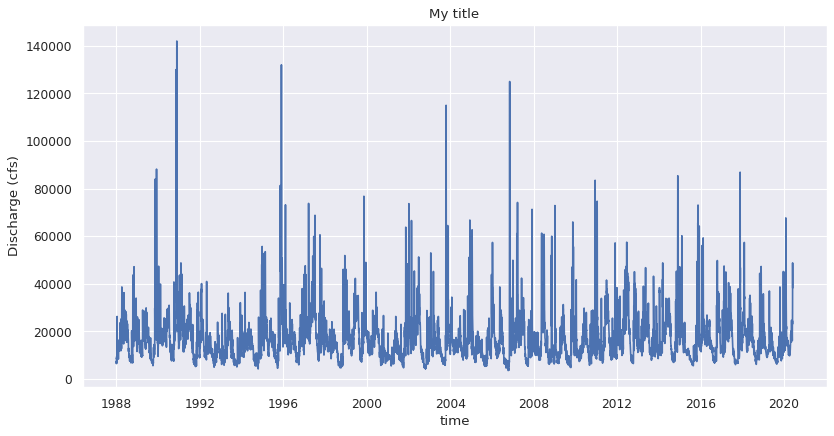

In [9]:
# Plot the discharge
f = plt.figure(num=None, figsize=(12,6), dpi=80)
plt.plot(t,Q)
plt.xlabel('time')
plt.ylabel('Discharge (cfs)')
plt.title('My title')
